In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
import re
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import requests
import seaborn as sns

In [39]:
# import geopandas as gpd

In [102]:
heatIslands = pd.read_excel('data/holc_heat.xls')
heatIslands

,holcNum_JSONToFeatures.OBJECTID,holcNum_JSONToFeatures.name,holcNum_JSONToFeatures.holc_id,holcNum_JSONToFeatures.holc_grade,holcNum_JSONToFeatures.area_description_data,holcNum_JSONToFeatures.Shape_Length,holcNum_JSONToFeatures.Shape_Area,ZonalSt_FLMiami1.OBJECTID,ZonalSt_FLMiami1.holc_id,ZonalSt_FLMiami1.ZONE_CODE,...,ZonalSt_FLMiami1.MAX,ZonalSt_FLMiami1.RANGE,ZonalSt_FLMiami1.MEAN,ZonalSt_FLMiami1.STD,ZonalSt_FLMiami1.SUM,ZonalSt_FLMiami1.VARIETY,ZonalSt_FLMiami1.MAJORITY,ZonalSt_FLMiami1.MINORITY,ZonalSt_FLMiami1.MEDIAN,ZonalSt_FLMiami1.PCT90
0,1,Miami Shores,A1,4,"{""5"":""Peak sales prices occured in July of 193...",0.088256,0.000218,1,A1,1,...,130,29,110.418899,3.036189,366922,26,109,101,110,114
1,2,Brickell Ave. District,A10,4,"{""5"":"""",""6"":""Brickell Ave. District, Miami A 1...",0.053140,0.000103,2,A10,2,...,121,26,109.518188,5.041198,171615,26,113,118,111,115
2,3,Natoma Manors,A11,4,"{""5"":"""",""6"":""Natoma Manors, Miami, Florida A 1...",0.019355,0.000020,3,A11,3,...,112,10,106.661290,1.832886,33065,11,106,102,106,109
3,4,New Shenandoah,A12,4,"{""5"":""This is the most rapidly developing sect...",0.055318,0.000113,4,A12,4,...,122,13,115.227826,2.215030,198768,14,115,122,115,118
4,5,Old Shenandoah,A13,4,"{""5"":""There is a small percentage of these hou...",0.037127,0.000049,5,A13,5,...,121,8,117.134130,1.479139,88202,9,117,113,117,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,NaN,D5,1,"{""5"":""This is a sparsely settled outlying area...",0.165974,0.000510,70,D5,70,...,140,32,118.605091,3.735599,927136,31,117,138,118,123
70,71,Northwest Miami,D6,1,"{""5"":"""",""6"":""Majority in Northwest portion of ...",0.184375,0.000367,71,D6,71,...,137,28,122.168563,4.218478,687076,28,120,137,122,128
71,72,Downtown Northwest,D7,1,"{""5"":""This is a downtown Negro area, practical...",0.056819,0.000171,72,D7,72,...,144,35,118.607754,4.085238,312057,32,118,138,118,123
72,73,NaN,D8,1,"{""5"":""This is a small Southwest downtown Negro...",0.018047,0.000015,73,D8,73,...,125,8,122.622881,1.741123,28939,9,124,117,123,124


In [103]:
#Rename columns so they are standardized and more readable
heatIslands.rename(columns={'ZonalSt_FLMiami1.MEDIAN':'MedianTemp'}, inplace=True)
heatIslands.rename(columns={'holcNum_JSONToFeatures.holc_grade':'GradeScore'}, inplace=True)
heatIslands.rename(columns={'ZonalSt_FLMiami1.MEAN':'Mean'}, inplace=True)
heatIslands.rename(columns={'ZonalSt_FLMiami1.MAX':'Max'}, inplace=True)
heatIslands.rename(columns={'holcNum_JSONToFeatures.holc_id':'holc_id'}, inplace=True)

In [104]:
## Note the HOLC categorized neighhbordhoods'A' = Best ... 'D'=Hazard
# Letter grades are also represented as scores 4-1 
heatIslands1 = heatIslands[['MedianTemp','GradeScore','Mean','Max','holc_id']]
heatIslands1 

,MedianTemp,GradeScore,Mean,Max,holc_id
0,110,4,110.418899,130,A1
1,111,4,109.518188,121,A10
2,106,4,106.661290,112,A11
3,115,4,115.227826,122,A12
4,117,4,117.134130,121,A13
...,...,...,...,...,...
69,118,1,118.605091,140,D5
70,122,1,122.168563,137,D6
71,118,1,118.607754,144,D7
72,123,1,122.622881,125,D8


In [99]:
heatIslands2  = heatIslands1.rename(columns={"GradeScore": "holc_grade"})

In [100]:

heatIslands2

,MedianTemp,holc_grade,Mean,Max,holc_id
0,110,4,110.418899,130,A1
1,111,4,109.518188,121,A10
2,106,4,106.661290,112,A11
3,115,4,115.227826,122,A12
4,117,4,117.134130,121,A13
...,...,...,...,...,...
69,118,1,118.605091,140,D5
70,122,1,122.168563,137,D6
71,118,1,118.607754,144,D7
72,123,1,122.622881,125,D8


In [93]:
heatIslands2 = heatIslands2.groupby('holc_grade')['MedianTemp'].mean()
heatIslands2 =heatIslands2.to_frame()
heatIslands2= heatIslands2.reset_index()

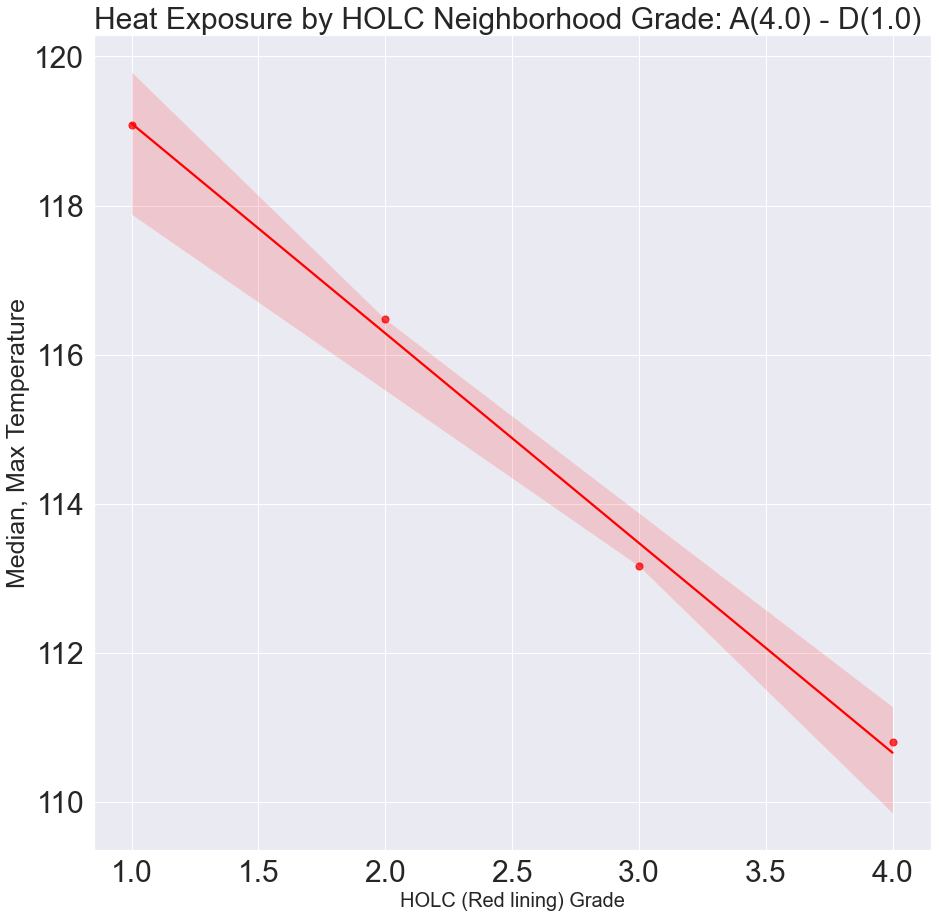

In [47]:
sns.set(rc = {'figure.figsize':(15,15)})


p1 = sns.regplot(data= heatIslands2,  x="holc_grade", y="MedianTemp", fit_reg=True,  color= 'red',scatter_kws={'s':50})
p1.set_xlabel("HOLC (Red lining) Grade: A(4.0) - D(1.0) ", fontsize = 20)

p1.set_xlabel("HOLC (Red lining) Grade", fontsize = 20)
p1.set_ylabel("Median, Max Temperature", fontsize = 25)
p1.set_title("Heat Exposure by HOLC Neighborhood Grade: A(4.0) - D(1.0) ", fontsize = 30)

p1.tick_params(labelsize=30)


plt.savefig('holcGraphs/holcHeat.png')

In [48]:
# corrMatrix = heatIslands1.corr()
# sns.heatmap(corrMatrix, annot=True)
# plt.show()

ELEVATION

In [49]:
dfElevation = pd.read_csv('data/holc_elev.csv')
dfElevation['holc_id'].merge(heatIslands1, on='hold_id', how='left')

,OBJECTID,holc_id,ZONE_CODE,COUNT,AREA,MIN,MAX,MEAN
0,1,A1,1,1041718,26042950,-0.327994,14.942991,8.320908
1,2,A10,2,492238,12305950,-0.280000,49.035973,14.222938
2,3,A11,3,96555,2413875,3.316000,22.129992,15.606367
3,4,A12,4,540360,13509000,5.510053,15.218997,10.063169
4,5,A13,5,236099,5902475,4.144005,15.406997,9.750800
...,...,...,...,...,...,...,...,...
69,70,D5,70,2438932,60973300,0.034001,30.542999,9.076029
70,71,D6,71,1757136,43928400,-5.584886,38.699993,9.449970
71,72,D7,72,819665,20491625,0.280000,43.693001,12.113272
72,73,D8,73,73446,1836150,4.635003,14.414996,8.796817


In [51]:
dfHolcGrades = pd.read_csv('data/holc_grades.csv')
dfHolcGrades 

,name,holc_id,holc_grade,area_description_data,geometry
0,Miami Shores,A1,A,{'5': 'Peak sales prices occured in July of 19...,"MULTIPOLYGON (((-80.177291 25.865415, -80.1772..."
1,Brickell Ave. District,A10,A,"{'5': '', '6': 'Brickell Ave. District, Miami ...","MULTIPOLYGON (((-80.190797 25.756686, -80.1914..."
2,Natoma Manors,A11,A,"{'5': '', '6': 'Natoma Manors, Miami, Florida ...","MULTIPOLYGON (((-80.21830199999999 25.741955, ..."
3,New Shenandoah,A12,A,{'5': 'This is the most rapidly developing sec...,"MULTIPOLYGON (((-80.206262 25.753058, -80.2100..."
4,Old Shenandoah,A13,A,{'5': 'There is a small percentage of these ho...,"MULTIPOLYGON (((-80.221593 25.753164, -80.2214..."
...,...,...,...,...,...
69,NaN,D5,D,{'5': 'This is a sparsely settled outlying are...,"MULTIPOLYGON (((-80.24406399999999 25.804895, ..."
70,Northwest Miami,D6,D,"{'5': '', '6': 'Majority in Northwest portion ...","MULTIPOLYGON (((-80.207596 25.784049, -80.2073..."
71,Downtown Northwest,D7,D,"{'5': 'This is a downtown Negro area, practica...","MULTIPOLYGON (((-80.206227 25.797257, -80.2000..."
72,NaN,D8,D,{'5': 'This is a small Southwest downtown Negr...,"MULTIPOLYGON (((-80.20236 25.763833, -80.20321..."


In [52]:
dfHolcGrades1 = dfHolcGrades[['name','holc_id','holc_grade']]
dfHolcGrades1

,name,holc_id,holc_grade
0,Miami Shores,A1,A
1,Brickell Ave. District,A10,A
2,Natoma Manors,A11,A
3,New Shenandoah,A12,A
4,Old Shenandoah,A13,A
...,...,...,...
69,NaN,D5,D
70,Northwest Miami,D6,D
71,Downtown Northwest,D7,D
72,NaN,D8,D


In [53]:
elev1 =  dfHE[['ZONE_CODE', 'MEAN','holc_id']]
elev1

,ZONE_CODE,MEAN,holc_id
0,1,8.320908,A1
1,2,14.222938,A10
2,3,15.606367,A11
3,4,10.063169,A12
4,5,9.750800,A13
...,...,...,...
69,70,9.076029,D5
70,71,9.449970,D6
71,72,12.113272,D7
72,73,8.796817,D8


In [54]:
dfHE2= elev1.merge(dfHolcGrades1, on='holc_id', how='left')

In [55]:
dfHE2 = dfHE2.rename(columns={"MEAN": "Mean_Neighborhood_Elevation"})

In [56]:
dfHE3Mean= dfHE2.groupby(dfHE2['holc_grade'])["Mean_Neighborhood_Elevation"].mean()
dfHE3Mean =dfHE3Mean.to_frame()
dfHE3Mean.sort_values(by = "holc_grade", ascending=True)
dfHE3Mean = dfHE3Mean.reset_index()

In [57]:
dfHE3Mean.sort_values(by="holc_grade", ascending=False, inplace=True)
dfHE3Mean

,holc_grade,Mean_Neighborhood_Elevation
3,D,9.532565
2,C,8.668769
1,B,8.451025
0,A,7.555483


In [77]:
grade_dict = {'A':1,'B':2,'C':3,'D':4}

In [79]:

dfHE3Mean['holc_grade'] = dfHE3Mean['holc_grade'].replace(grade_dict)
dfHE3Mean

,holc_grade,Mean_Neighborhood_Elevation
3,4,9.532565
2,3,8.668769
1,2,8.451025
0,1,7.555483


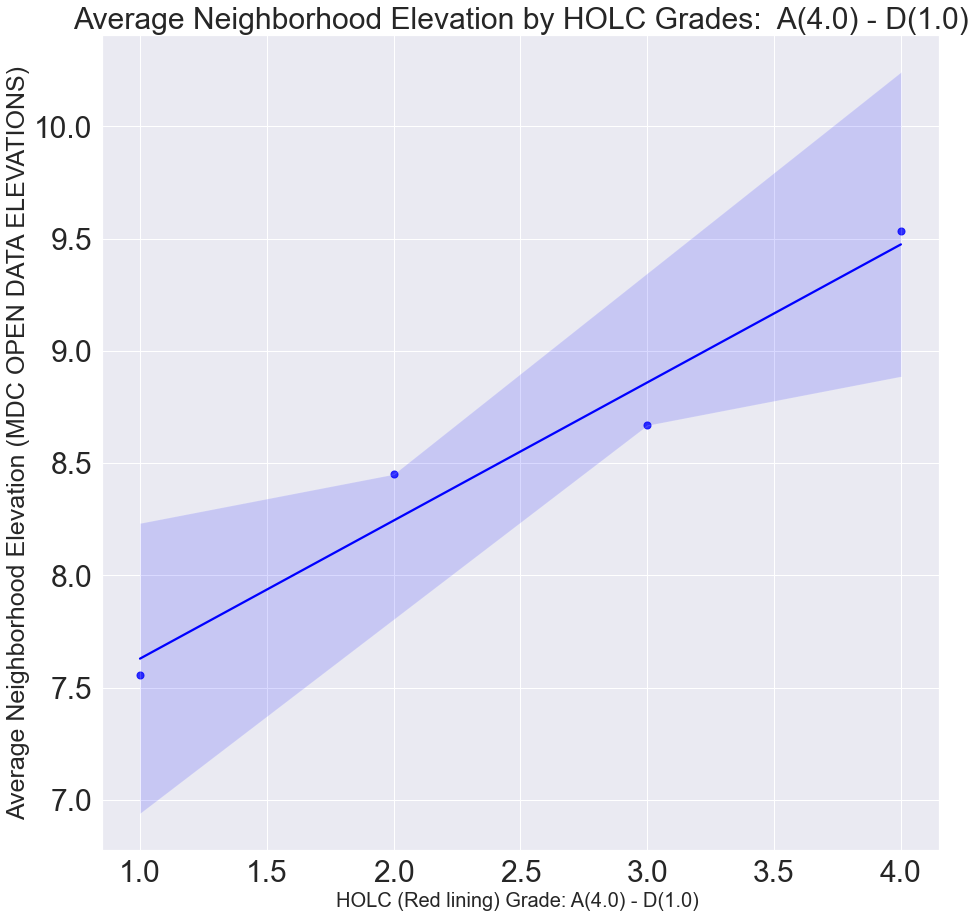

In [80]:
sns.set(rc = {'figure.figsize':(15,15)})

p1 = sns.regplot(data=dfHE3Mean,  x=dfHE3Mean["holc_grade"], y="Mean_Neighborhood_Elevation", fit_reg=True,  color= 'blue',scatter_kws={'s':50})
p1.set_xlabel("HOLC (Red lining) Grade: A(4.0) - D(1.0) ", fontsize = 20)
p1.set_ylabel("Average Neighborhood Elevation (MDC OPEN DATA ELEVATIONS)", fontsize = 25)
p1.set_title("Average Neighborhood Elevation by HOLC Grades:  A(4.0) - D(1.0)", fontsize = 30)


#tick size
p1.tick_params(labelsize=30)

plt.savefig('holcGraphs/Average Neighborhood Elevation by HOLC Grades.png')




TREE CANOPY COVERAGE

In [115]:
treeC = pd.read_excel('data/holc_tree.xls')
treeC 

,OBJECTID,holc_id,ZONE_CODE,COUNT,AREA,MEAN
0,1,A1,1,20,0.000218,7.505753
1,2,A10,2,11,0.000120,9.083878
2,3,A11,3,1,0.000011,19.964495
3,4,A12,4,10,0.000109,4.974944
4,5,A13,5,5,0.000054,3.049167
...,...,...,...,...,...,...
67,68,D4,68,27,0.000294,4.272904
68,69,D5,69,47,0.000512,3.094395
69,70,D6,70,39,0.000425,1.410581
70,71,D7,71,19,0.000207,1.958738


In [116]:
treeC = treeC[['holc_id', 'MEAN']]

In [117]:
treeC = treeC.rename(columns={"MEAN": "Mean Tree Canopy Coverage"})

In [118]:
treeC

,holc_id,Mean Tree Canopy Coverage
0,A1,7.505753
1,A10,9.083878
2,A11,19.964495
3,A12,4.974944
4,A13,3.049167
...,...,...
67,D4,4.272904
68,D5,3.094395
69,D6,1.410581
70,D7,1.958738


In [119]:
treeC = treeC.merge(heatIslands1, on="holc_id", how="left")
treeC= treeC.groupby(treeC['GradeScore'])["Mean Tree Canopy Coverage"].mean()
treeC =treeC.to_frame()
treeC.sort_values(by = "GradeScore", ascending=True)
treeC = treeC.reset_index()

In [120]:
treeC

,GradeScore,Mean Tree Canopy Coverage
0,1,3.207434
1,2,4.846830
2,3,5.724602
3,4,6.969792


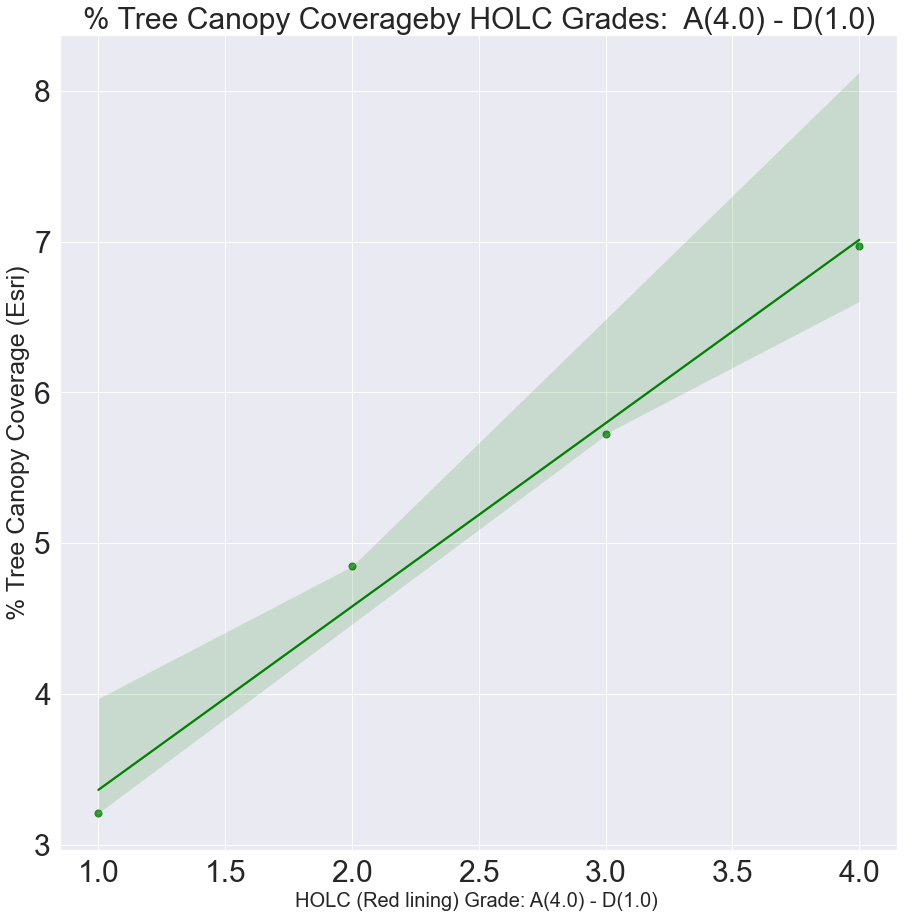

In [122]:
sns.set(rc = {'figure.figsize':(15,15)})

# p1 = sns.regplot(data=dfHE2,  x=dfHE2.index, y="Mean_Neighborhood_Elevation", fit_reg=True,  color= 'red',scatter_kws={'s':50})
p1 = sns.regplot(data=treeC,  x=treeC["GradeScore"], y="Mean Tree Canopy Coverage", fit_reg=True,  color= 'green',scatter_kws={'s':50})
p1.set_xlabel("HOLC (Red lining) Grade: A(4.0) - D(1.0) ", fontsize = 20)
p1.set_ylabel("% Tree Canopy Coverage (Esri)", fontsize = 25)
p1.set_title("% Tree Canopy Coverageby HOLC Grades:  A(4.0) - D(1.0)", fontsize = 30)


#tick size
p1.tick_params(labelsize=30)

plt.savefig('holcGraphs/treeCanopyCoverageHolc.png')



RENT INCREASE

In [123]:
rent = pd.read_excel('data/rentIncreasePer.xls')
rent

,OBJECTID,holcNum_JSONToFeatures_holc_id,ZONE_CODE,COUNT,AREA,MEAN,PERCENTAGE
0,1,A1,1,47,2937500,0.428900,42.890000
1,2,A11,3,6,375000,0.467400,46.740000
2,3,A12,4,10,625000,0.418000,41.800000
3,4,A13,5,8,500000,0.418000,41.800000
4,5,A14,6,8,500000,0.451300,45.130000
...,...,...,...,...,...,...,...
61,62,D4,69,41,2562500,0.281046,28.104634
62,63,D6,71,35,2187500,0.167900,16.790000
63,64,D7,72,3,187500,0.167900,16.790000
64,65,D8,73,2,125000,0.666700,66.670000


In [139]:
rent = rent.rename(columns={"holcNum_JSONToFeatures_holc_id": "holc_id"})

In [141]:
rent

,OBJECTID,ZONE_CODE,COUNT,AREA,MEAN,PERCENTAGE,MedianTemp,Mean,Max
holc_grade,,,,,,,,,
1,61.5,68.400000,19.700000,1.231250e+06,0.338523,33.852279,119.500000,119.611445,132.400000
2,47.5,50.444444,22.166667,1.385417e+06,0.424488,42.448762,116.166667,116.242176,128.166667
3,26.5,28.291667,16.000000,1.000000e+06,0.442932,44.293151,113.041667,112.997165,123.250000
4,7.5,8.428571,20.000000,1.250000e+06,0.418219,41.821944,110.785714,110.835649,119.714286


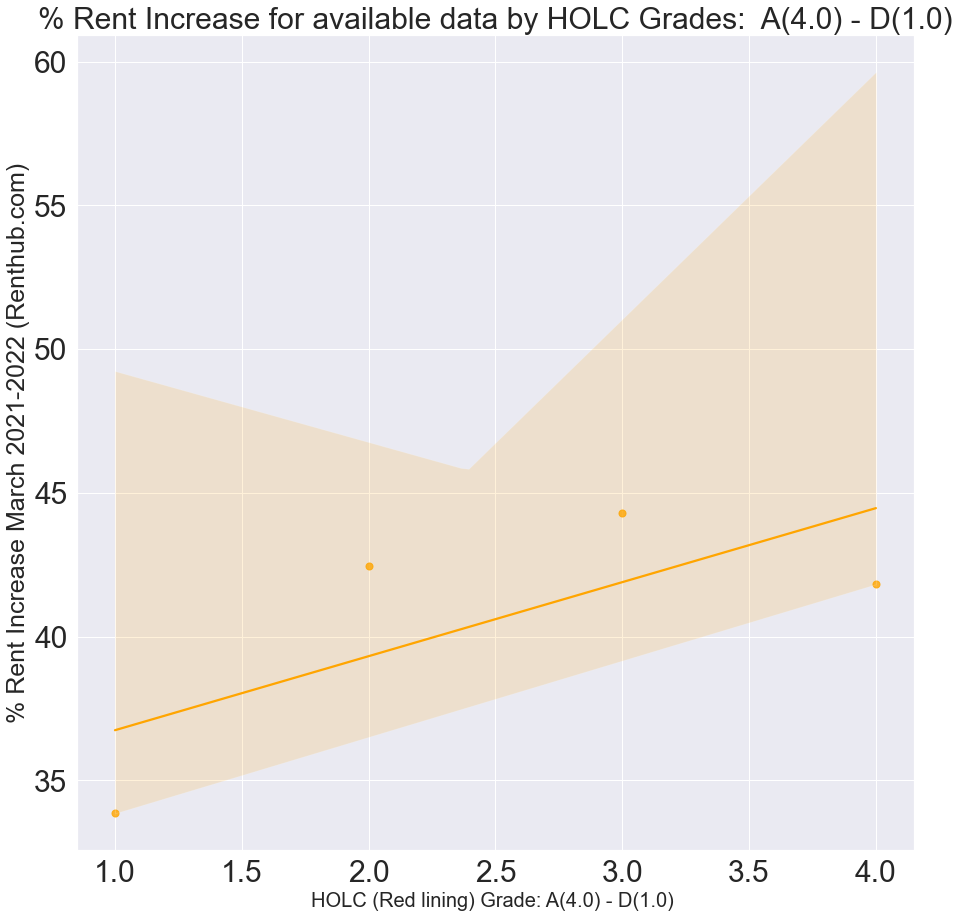

In [142]:
sns.set(rc = {'figure.figsize':(15,15)})

# p1 = sns.regplot(data=dfHE2,  x=dfHE2.index, y="Mean_Neighborhood_Elevation", fit_reg=True,  color= 'red',scatter_kws={'s':50})
p1 = sns.regplot(data=rent,  x=rent.index, y="PERCENTAGE", fit_reg=True,  color= 'orange',scatter_kws={'s':50})
p1.set_xlabel("HOLC (Red lining) Grade: A(4.0) - D(1.0) ", fontsize = 20)
p1.set_ylabel("% Rent Increase March 2021-2022 (Renthub.com)", fontsize = 25)
p1.set_title("% Rent Increase for available data by HOLC Grades:  A(4.0) - D(1.0)", fontsize = 30)


#tick size
p1.tick_params(labelsize=30)

plt.savefig('holcGraphs/rentIncrease.png')